# Projeto Final Data Science I - Udacity

Explorando os dados do desatre Titanic.

Link: [Dicionário de dados](https://www.kaggle.com/c/titanic/data)

Perguntas propostas baseadas nos dados disponibilizados:

1. Qual taxa de letalidade do desastre?
2. Quais as caracteríticas das classes e a probabilidade de sobreviver de cada uma?
3. Pessoas da 1ª classe tiveram mais chances de sobreviver que pessoas da 2ª e 3ª? Pessoas da 2ª mais do que pessoas da 3ª?
4. A prioridade no atendimento emergencial de mulheres e crianças foi um fator relevante para aumentar as chances de sobrevivência?



In [1]:
# Importação dos dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_titanic = pd.read_csv("titanic-data-6.csv")

## Explorando dados iniciais

In [2]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Tipos de dados
def verificar_colunas(df):
    """
    Esta função deve exibir todas as colunas do DataFrame

    Args:
        df: DataFrame que desejamos exibir as colunas.

    Retorno/Saída:
        Não tem retorno, porém a saída é a exibição de cada coluna com o seu nome e tipo.
    """
    for column in df.columns:
        print("Coluna: {0}, tipo: {1}".format(column, type(df[column][0])))

verificar_colunas(df_titanic)

Coluna: PassengerId, tipo: <class 'numpy.int64'>
Coluna: Survived, tipo: <class 'numpy.int64'>
Coluna: Pclass, tipo: <class 'numpy.int64'>
Coluna: Name, tipo: <class 'str'>
Coluna: Sex, tipo: <class 'str'>
Coluna: Age, tipo: <class 'numpy.float64'>
Coluna: SibSp, tipo: <class 'numpy.int64'>
Coluna: Parch, tipo: <class 'numpy.int64'>
Coluna: Ticket, tipo: <class 'str'>
Coluna: Fare, tipo: <class 'numpy.float64'>
Coluna: Cabin, tipo: <class 'float'>
Coluna: Embarked, tipo: <class 'str'>


In [4]:
# Colunas
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Quantidade de nulos por coluna
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Tratamento e limpeza dos dados

Dos 891 registros, 687 cabines não foram informadas e 177 pessoas não forneceram a idade.

O tratamento escolhido para cabines será retirar do dataframe, para idade será atribuir 0 para os registros que não forneceram a informação.

Com base nas perguntas definidas algumas colunas não farão parte da festa, são elas: ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'] 


Estapas da limpeza:
- Identificar e remover dados duplicados
- Remover colunas que não serão utilizadas na análise
- Corrigir formatos e valores de dados

Vamos aos tratamentos...

##### Passo 1: Identificar e remover dados duplicados

In [6]:
# Validando se não existem registros duplicados (Esperado que não)
print("Existem registros duplicados? {}"
      .format("Não, tudo OK." if(df_titanic.duplicated().sum() == 0) else "Sim, necessário tratar."))

Existem registros duplicados? Não, tudo OK.


##### Passo 2: Remover colunas que não serão utilizadas na análise

In [7]:
colunas_descartadas = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'] 
df_titanic.drop(colunas_descartadas, axis=1, inplace=True)

##### Passo 3: Corrigir formatos e valores de dados

In [8]:
# 3.1 Adequando nomes
df_titanic.columns = ['flag_sobrevivente', 'classe', 'sexo', 'idade', 'tarifa', 'local_de_embarque']

# Verificando idade
def informativo_idade(df_titanic):
    """
    Esta função deve exibir um resumo sobre os passageiros(mulheres e homens) que não informaram suas idades 
    e o percentual que esta fatia representam do público geral.

    Args:
        df_titanic: DataFrame que desejamos extrair as informações sobre as idades não informadas.

    Retorno/Saída:
        Não tem retorno, porém a saída é a exibição dos homens e mulheres que não informaram a idade com seu percentual.
    """
    mulheres_que_nao_informaram_idade = (df_titanic.query('idade.isnull()', engine='python')['sexo'] == 'female').sum()
    homens_que_nao_informaram_idade = (df_titanic.query('idade.isnull()', engine='python')['sexo'] == 'male').sum()
    pessoas_que_nao_informaram_idade = mulheres_que_nao_informaram_idade + homens_que_nao_informaram_idade

    print("{} mulheres e {} homens não informaram suas idades e representam {:.2f}% do público geral."
             .format(mulheres_que_nao_informaram_idade, 
                     homens_que_nao_informaram_idade, 
                     (pessoas_que_nao_informaram_idade / df_titanic.shape[0])*100 ))

informativo_idade(df_titanic)

53 mulheres e 124 homens não informaram suas idades e representam 19.87% do público geral.


Homens e mulheres que não informaram a idade representam quase 20% do total, é uma quantidade que fatalmente afetará outras análises, porém para as perguntas que escolhi basta igualar as idades não informadas a 0 para que os gráfico sejam corretamente exibidos, aléms das informações no describe.

In [9]:
# 3.2 Atualizando valores faltantes da idade
df_titanic['idade'].fillna(0, inplace=True)

In [10]:
# Analisando tamanho do dataFrame pós-tratamentos
df_titanic.shape

(891, 6)

In [11]:
df_titanic.describe()

,flag_sobrevivente,classe,idade,tarifa
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.799293,32.204208
std,0.486592,0.836071,17.596074,49.693429
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,7.910400
50%,0.000000,3.000000,24.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


#### Seguindo...

## Exploração e Visualização


#### Pergunta 1
Qual taxa de letalidade do desastre?

In [12]:
total_de_passageiros = df_titanic.shape[0]

In [13]:
sobreviventes_por_sexo = df_titanic.groupby(['sexo', 'flag_sobrevivente']).size()

sobreviventes_por_sexo

sexo    flag_sobrevivente
female  0                     81
        1                    233
male    0                    468
        1                    109
dtype: int64

**Primeiro ponto de atenção:** Identificamos que do total de 891 pessoas, 81 mulheres e 468 homens morreram totalizando 549 mortos e 342 sobreviventes.

Isso representa uma taxa de letalidade de **61,62%** para o público geral, sem maiores segmentações.

Vamos extrair essas informações dos dados...

In [14]:
homens_que_morreram = sobreviventes_por_sexo['male', 0]
homens_que_sobreviveram = sobreviventes_por_sexo['male', 1]
mulheres_que_morreram = sobreviventes_por_sexo['female', 0]
mulheres_que_sobreviveram = sobreviventes_por_sexo['female', 1]

total_de_sobreviventes = homens_que_sobreviveram + mulheres_que_sobreviveram
total_de_mortes = homens_que_morreram + mulheres_que_morreram
taxa_de_letalidade_geral = ((total_de_mortes / total_de_passageiros) * 100)

print("{} homens e {} mulheres morreram".format(homens_que_morreram, mulheres_que_morreram))
print("{} homens e {} mulheres sobreviveram".format(homens_que_sobreviveram, mulheres_que_sobreviveram))
print("{:.2f}% é a taxa de letalidade geral sem maiores segmentações".format(taxa_de_letalidade_geral))
print("Total de {} sobreviventes e {} mortos".format(total_de_sobreviventes, total_de_mortes))

468 homens e 81 mulheres morreram
109 homens e 233 mulheres sobreviveram
61.62% é a taxa de letalidade geral sem maiores segmentações
Total de 342 sobreviventes e 549 mortos


Ou seja, uma pessoa (sem levar em considerações questões socio-econômicas, localização no navio, sexo e prioridade) teria maior probabilidade de morrer.

Vamos trabalhar para explorar mais do que isso.

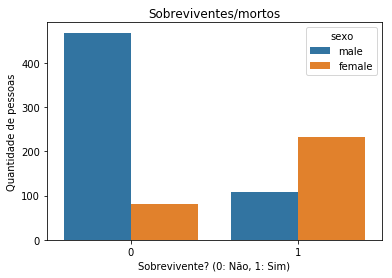

In [15]:
sns.countplot(data=df_titanic, x='flag_sobrevivente', hue='sexo')

plt.title("Sobreviventes/mortos")
plt.xlabel('Sobrevivente? (0: Não, 1: Sim)')
plt.ylabel('Quantidade de pessoas')
plt.show()

Observamos no gráfico anterior que a quantidade e a proporção de sobreviventes mulheres foi bem maior que as dos homens. 

Talvez pelo fato de terem seguido a prioridade no atendimento de mulheres e crianças, mas aguarde, temos esta análise na pergunta 4 e detalharemos sobre o assunto.

Por enquanto sabemos que as mulheres tiveram mais sorte que os homens, no geral. Ainda não destrinchamos as crianças dos 2 gêneros.

Vamos avaliar a proporção dos sobreviventes nos homens e mulheres abaixo:

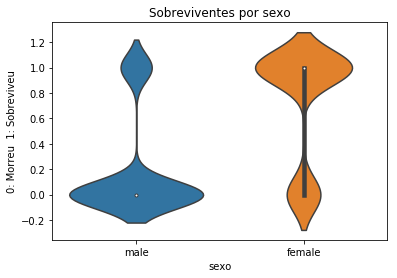

In [16]:
sns.violinplot(data=df_titanic, y='flag_sobrevivente', x='sexo')
plt.title('Sobreviventes por sexo')
plt.ylabel('0: Morreu  1: Sobreviveu')
plt.show()

Analisando os dois últimos gráficos chegamos facilmente na conclusão que a maioria dos homens morreu e a maioria das mulheres sobreviveu. 

Neste último o 0.0 representa que a pessoa não sobreviveu, o 1.0 significa que ela sobreviveu. Percebemos que o gráfico alarga consideravelmente nos homens não sobreviventes e nas mulheres sobreviventes, representando acertadamente a informação que inferimos no 1º gráfico.

Vamos calcular a taxa de letalidade por sexo:

In [17]:
passageiros_por_sexo = df_titanic.groupby(['sexo']).size()
total_de_mulheres = passageiros_por_sexo['female']
total_de_homens = passageiros_por_sexo['male']

taxa_de_letalidade_homens = ((homens_que_morreram / total_de_homens) * 100)
taxa_de_letalidade_mulheres = ((mulheres_que_morreram / total_de_mulheres) * 100)

print("{:.2f}% é a taxa de letalidade para homens de forma geral".format(taxa_de_letalidade_homens))
print("{:.2f}% é a taxa de letalidade para mulheres de forma geral".format(taxa_de_letalidade_mulheres))

81.11% é a taxa de letalidade para homens de forma geral
25.80% é a taxa de letalidade para mulheres de forma geral


##### Damos como respondida a primeira pergunta sobre a taxa de letalidade geral do desastre, agora entraremos nas especificidades das demais perguntas, explorando um pouco mais nesta mesma linha.


#### Pergunta 2
Quais as caracteríticas das classes e a probabilidade de sobreviver de cada uma?

Características desejadas:
- tarifa média
- idade média
- local de embarque mais frequente (moda)
- quantidade de sobreviventes
- quantidade de mortos

In [18]:
passageiros_por_classe = df_titanic.groupby('classe').size()
sobreviventes_ou_nao_por_classe =  df_titanic.groupby(['classe', 'flag_sobrevivente']).size()

display(passageiros_por_classe)
display(sobreviventes_ou_nao_por_classe)

classe
1    216
2    184
3    491
dtype: int64

classe  flag_sobrevivente
1       0                     80
        1                    136
2       0                     97
        1                     87
3       0                    372
        1                    119
dtype: int64

In [20]:
def caracteristicas_da_classe(classe):
    """
    Esta função deve exibir as características da classe passada por parâmetro.
    
    Args:
        classe: Inteiro da classe que desejamos exibir informações

    Retorno/Saída:
        Não tem retorno, porém a saída é a exibição das características da classe, são elas:
        - Tarifa Média
        - Idade Média
        - Local de Embarque mais utilizado
        - Total de passageiros
        - Quantidade de sobreviventes e mortos
        - Probabilidade de sobreviver de um passageiro desta classe
    """
    df_classe = df_titanic.query('classe == @classe')
    tarifa_media = float("{:.2f}".format(df_classe['tarifa'].mean()))
    idade_media = int(df_classe['idade'].mean())
    embarque_mais_frequente = df_titanic['local_de_embarque'].mode()[0]
    qtd_embarques = df_classe[df_classe['local_de_embarque'] == embarque_mais_frequente].shape[0]
    passageiros_da_classe = df_classe.shape[0]
    sobreviventes = df_classe[df_classe['flag_sobrevivente'] == 1].shape[0]
    mortos = passageiros_da_classe - sobreviventes
    probabilidade_de_sobreviver = float("{:.2f}".format(df_classe['flag_sobrevivente'].mean() * 100))
    
    print("Características da {}ª Classe:\n Tarifa média: {}\n Idade média: {}\n Local de Embarque mais utilizado: {}\n"
          " Total de passageiros: {}\n Sobreviventes/Mortos: {}/{}\n Probabilidade de sobreviver: {}%\n\n"
          .format(classe, tarifa_media, idade_media, embarque_mais_frequente, passageiros_da_classe, 
                  sobreviventes, mortos, probabilidade_de_sobreviver))

caracteristicas_da_classe(1)
caracteristicas_da_classe(2)
caracteristicas_da_classe(3)

Características da 1ª Classe:
 Tarifa média: 84.15
 Idade média: 32
 Local de Embarque mais utilizado: S
 Total de passageiros: 216
 Sobreviventes/Mortos: 136/80
 Probabilidade de sobreviver: 62.96%


Características da 2ª Classe:
 Tarifa média: 20.66
 Idade média: 28
 Local de Embarque mais utilizado: S
 Total de passageiros: 184
 Sobreviventes/Mortos: 87/97
 Probabilidade de sobreviver: 47.28%


Características da 3ª Classe:
 Tarifa média: 13.68
 Idade média: 18
 Local de Embarque mais utilizado: S
 Total de passageiros: 491
 Sobreviventes/Mortos: 119/372
 Probabilidade de sobreviver: 24.24%




Representando a probabilidade de uma pessoas sobreviver pela classe que ela estava chegamos no seguinte gráfico:

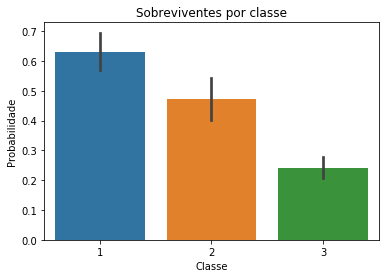

In [21]:
sns.barplot(data=df_titanic, y='flag_sobrevivente', x='classe')

plt.title('Sobreviventes por classe')
plt.ylabel('Probabilidade')
plt.xlabel('Classe')
plt.show()

**Entendimento do gráfico:** No gráfico acima detalhamos a chance de sobrevivência por classe, a da primeira classe foi de aproximadamente 62%, da 2ª classe de quase 50% e da 3ª classe de um pouco menos de 30%.

Ao explorar os locais principais de embarque notei que em todas as classes o principal ponto de embarque foi em **S** (Southampton). 

Pesquisando no [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic) verifiquei que este foi o principal porto de embarque do transatlântico, representando 70%(922) do total de 1316 passageiros do navio.

Detalhando o embaque por porto e classe encontramos os seguintes números:

In [22]:
local_de_embarque_das_classes = df_titanic.groupby(['local_de_embarque','classe']).size()
display(local_de_embarque_das_classes)

local_de_embarque  classe
C                  1          85
                   2          17
                   3          66
Q                  1           2
                   2           3
                   3          72
S                  1         127
                   2         164
                   3         353
dtype: int64

#### Pergunta 3

Pessoas da 1ª classe tiveram mais chances de sobreviver que pessoas da 2ª e 3ª? Pessoas da 2ª mais do que pessoas da 3ª?

De acordo com o gráfico **Sobreviventes por classe**, da pergunta anterior, pessoas que estavam na 1ª classe tiveram mais chances de sobreviver que pessoas da 2ª e pessoas da 2ª classe tiveram mais chances que pessoas da 3ª.

Isso se deve ao fato também da localização das pessoas por classe fisicamente no navio:

- Parte superior: 1ª classe
- Camada intermediária: 2ª classe
- Fundo do navio: 3ª classe

De acordo com a [história](https://pt.wikipedia.org/wiki/Botes_salva-vidas_do_RMS_Titanic) os botes foram insuficientes e estavam na parte superior, isso nos ajuda a entender o motivo de um pessoa da 1ª classe ter tido uma chance de mais de 62% de sobreviver, provavelmente foram as primeiras a chegar nos botes.

Vamos explorar os quantitativos de sobreviventes por classe para complementar o entendimento e responder a pergunta.



1    136
3    119
2     87
Name: classe, dtype: int64


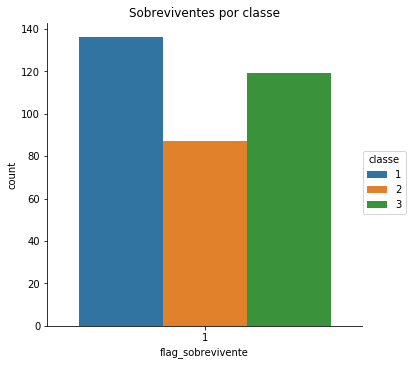

In [23]:
sobreviventes_por_classe = df_titanic[df_titanic['flag_sobrevivente'] == 1]
print(sobreviventes_por_classe['classe'].value_counts())

sns.factorplot('flag_sobrevivente', hue='classe', data=sobreviventes_por_classe, kind='count', size=5)

plt.title('Sobreviventes por classe')
plt.show()

**Entendimento do gráfico:** No gráfico acima detalhamos informações quantitativas sobre os sobreviventes por classe. Na 1ª classe tivemos quase 140 sobreviventes, na 2ª classe mais de 80 e na 3ª classe um pouco menos de 120 passageiros, chamando atenção para o resultado da 2 e 3 classes que detalharemos a seguir.



Respondendo às questões:

**Pessoas da 1ª classe tiveram mais chances de sobreviver que pessoas da 2ª e 3ª?**

Sim. Pessoas da primeira classe tiveram maiores chances (62%) e numericamente foram salvos em maior volume: 136 pessoas. 

**Pessoas da 2ª mais do que pessoas da 3ª?**

Sim. Apesar da quantidade de sobreviventes da 3ª classe ter superado em 32 o número da 2ª classe, foi comprovado que pessoas da 2ª classe tiveram quase o dobro de chances de sobrevivência do que pessoas da 3ª classe. 


Um economia de $6,98 (na tarifa média da 3ª para 2ª classe) que poderia ter feito a diferença, pois pessoas da 2ª classe tiveram quase 50% de chances de sobreviver.

Pergunta 3 OK, agora a última pergunta...


#### Pergunta 4

A prioridade no atendimento emergencial de mulheres e crianças foi um fator relevante para aumentar as chances de sobrevivência?

Como verificamos anteriormente, no arquivo disponibilizado 53 mulheres e 124 homens não informaram suas idades e representam 19.87% do público geral. Estes dados já foram retirados do dataframe e não serão considerados na análisa a seguir.

Daqueles que informaram idade:
 Idade média dos sobreviventes: 28.0
 Idade média dos não-sobreviventes: 31.0
 Sobrevivente mais novo: 0.42
 Sobrevivente mais velho: 80.0
 Não-sobrevivente mais novo: 1.0
 Não-sobrevivente mais velho: 74.0


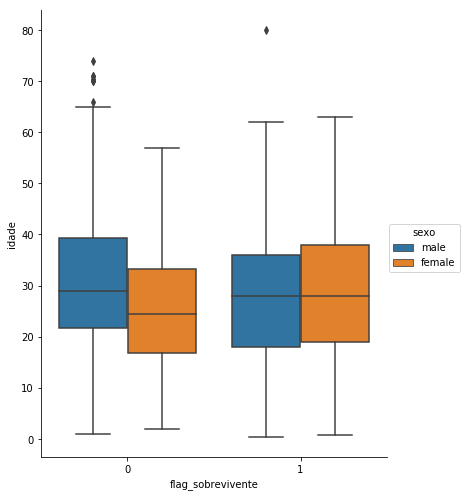

In [24]:
df_titanic_idade = df_titanic.query('idade > 0').copy()

media_idade_sobreviventes = df_titanic_idade[df_titanic_idade['flag_sobrevivente'] == True]['idade'].mean()
media_idade_mortos = df_titanic_idade[df_titanic_idade['flag_sobrevivente'] == False]['idade'].mean()
sobrevivente_mais_novo = df_titanic_idade[df_titanic_idade['flag_sobrevivente'] == True]['idade'].min()
sobrevivente_mais_velho = df_titanic_idade[df_titanic_idade['flag_sobrevivente'] == True]['idade'].max()
morto_mais_novo = df_titanic_idade[df_titanic_idade['flag_sobrevivente'] == False]['idade'].min()
morto_mais_velho = df_titanic_idade[df_titanic_idade['flag_sobrevivente'] == False]['idade'].max()

print("Daqueles que informaram idade:\n"
    " Idade média dos sobreviventes: {}\n"
    " Idade média dos não-sobreviventes: {}\n"
    " Sobrevivente mais novo: {}\n"
    " Sobrevivente mais velho: {}\n"
    " Não-sobrevivente mais novo: {}\n"
    " Não-sobrevivente mais velho: {}"
    .format(np.round(media_idade_sobreviventes), np.round(media_idade_mortos), 
            sobrevivente_mais_novo, sobrevivente_mais_velho, morto_mais_novo, morto_mais_velho ))

sns.factorplot(x="flag_sobrevivente", y="idade", hue='sexo', data=df_titanic_idade, kind="box", size=7, aspect=.8)

plt.show()

De acordo com o gráfico acima a idade não foi um fator decisivo na taxa de sobrevivência do passageiro, talvez pela quantidade reduzida de crianças no dataframe ou talvez pelas pessoas que não informaram a idade.

A idade média para aqueles que sobreviveram e mesmo aqueles que não sobreviveram estavam alinhadas entre si.

Vamos continuar explorando segmentando em categorias Homem, Mulher e Criança.

categoria  flag_sobrevivente
Criança    0                     29
           1                     42
Homem      0                    344
           1                     72
Mulher     0                     51
           1                    176
dtype: int64


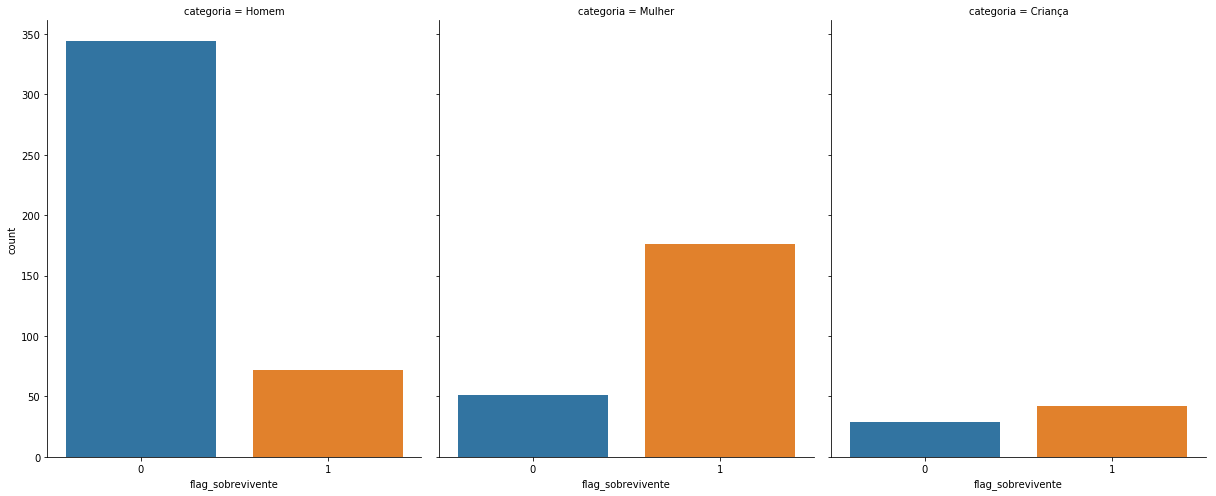

In [25]:
idade_de_corte_criancas = 14
restricoes_mulher = ((df_titanic_idade['sexo'] == 'female') & (df_titanic_idade['idade'] >= idade_de_corte_criancas))
restricoes_homem = ((df_titanic_idade['sexo'] == 'male') & (df_titanic_idade['idade'] >= idade_de_corte_criancas))
restricoes_crianca = (df_titanic_idade['idade'] < idade_de_corte_criancas)

df_titanic_idade.loc[restricoes_mulher, 'categoria'] = 'Mulher'
df_titanic_idade.loc[restricoes_homem, 'categoria'] = 'Homem'
df_titanic_idade.loc[restricoes_crianca, 'categoria'] = 'Criança'

print(df_titanic_idade.groupby(['categoria','flag_sobrevivente']).size())

sns.factorplot('flag_sobrevivente', col='categoria', data=df_titanic_idade, kind='count', size=7, aspect=.8)
plt.show()

Utilizamos a idade de corte de 14 anos para ser uma pessoa ser considerada criança.

Os gráficos reforçam a idéia de que "mulheres e crianças primeiro" desempenharam um papel na sobrevivência de crianças e mulheres.

## Conclusões

Os resultados da análise, embora provisórios, parecem indicar que classe e sexo, ou seja, ser uma mulher com posição socioeconômica superior (primeira classe), dariam uma melhor chance de sobrevivência quando a tragédia ocorresse no Titanic. 

Mulheres e crianças, em todas as classes, tendem a ter uma taxa de sobrevivência mais alta do que os homens no geral, mas de forma alguma a criança ou a mulher garantem a sobrevivência.

### Limitações

As **idades faltantes** foram uma limitação para alguns gráficos, como o da pergunta 4 que busca segmentar os passageiros pelas idade e pela sua probabilidade de sobrevivência. Um tratamento inicial foi preencher os valores não informados por zero, o que não comprometeu as análises iniciais. Já na pergunta 4 foi necessário copiar o DataFrame inicial excluindo na sequência os valores com zero para eliminar os passageiros que não informaram a idade e reduzir no percentual de erro das informações.

Outro campo que poderia ter agregado à análise foi o da **cabine** que provavelmente seguiria um padrão por classe, caberia uma pesquisa para validar esta informação e talvez achar uma lógica até pelo posicionamento dos passageiros.

### Links utilizados :

- http://www.previdencia.gov.br/dados-abertos/aeat-2013/secao-ii-indicadores-de-acidentes-do-trabalho/
- https://seaborn.pydata.org/generated/seaborn.factorplot.html
- https://pt.wikipedia.org/wiki/Botes_salva-vidas_do_RMS_Titanic
- https://pt.wikipedia.org/wiki/RMS_Titanic
- http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html
- https://www.python.org/dev/peps/pep-0257/
